#### Section 1: Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Section 2: Read Data

In [3]:
data = pd.read_csv("./data/austin_weather.csv")

In [4]:
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Drop the unnecessary data

In [7]:
data = data.drop(["Events", "Date", "SeaLevelPressureLowInches"], axis= 1)

In [8]:
data = data.replace('T', 0.0)

In [9]:
data = data.replace('-', 0.0)

In [12]:
data.to_csv("./data/austin_weather_final.csv")

#### Import Clean Data

In [16]:
data = pd.read_csv("./data/austin_weather_final.csv")
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [26]:
X = data.drop(['PrecipitationSumInches'],axis = 1)

In [27]:
Y = data['PrecipitationSumInches']

In [39]:
day_index = 798
days = [i for i in range(Y.size)]

#### Reshaping to the 2D Vector

In [28]:
Y = Y.values.reshape(-1,1)
Y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [29]:
Y.size

1319

#### Initialize the linear regression classifier

In [31]:
clf = LinearRegression()

In [33]:
clf.fit(X,Y)

LinearRegression()

#### Plot a Graph

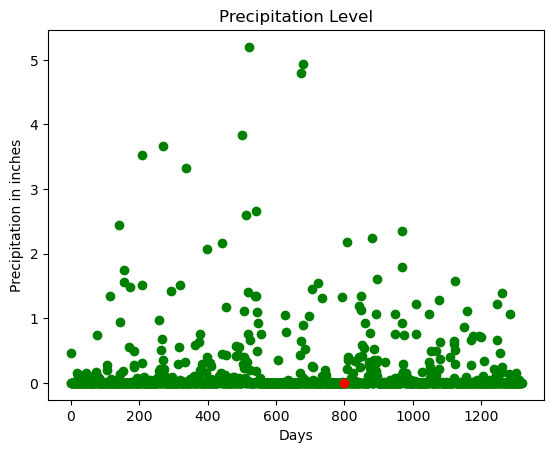

In [49]:
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color = 'r')
plt.title("Precipitation Level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()
X_vis = X.filter(['TempAvgF', 'DewPointAvgF','HumidityAvgPercent','DewPointAvgF','VisibilityHighMiles','WindAvgMPH'])

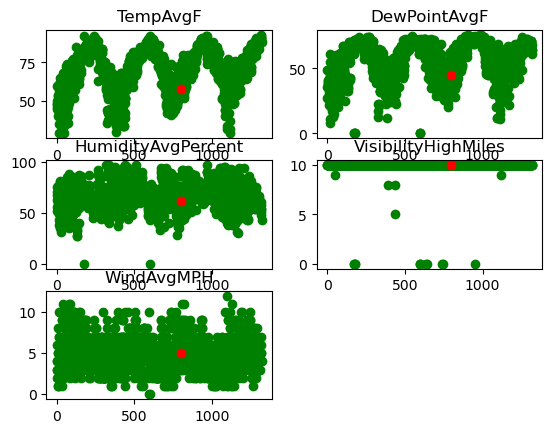

In [57]:
for i in range(X_vis.columns.size):
    plt.subplot(3,2,i + 1)
    plt.scatter(days,X_vis[X_vis.columns.values[i][:100]], color = 'g')
    plt.scatter(days[day_index], X_vis[X_vis.columns[i]][day_index], color='r')
    plt.title(X_vis.columns.values[i])

    
    
    